**NOTE: This project was completed with the assistance of Google Colab's built in Gemini AI.**


# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions.

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset).

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('/content/insurance2.csv')

In [ ]:
medical.shape

(1338, 8)

In [ ]:
medical.head()
#From Kaggle,
#This is "Sample Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

#age : age of policyholder
#sex: gender of policy holder (female=0, male=1)
#bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25
#steps: average walking steps per day of policyholder
#children: number of children / dependents of policyholder
#smoker: smoking state of policyholder (non-smoke=0;smoker=1)
#region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
#charges: individual medical costs billed by health insurance
#insuranceclaim: yes=1, no=0

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

**A:** The histogram of charges is heavily right-skewed, with a long tail extending towards higher charges. This indicates that the majority of medical charges are relatively low, while a smaller number of charges are significantly higher. The mean charge is approximately 13270.42, and the standard deviation is approximately 12105.48.

Given the skewness of the data, the mean might be pulled towards the higher values and may not be the best representation of a typical charge. The large standard deviation also reflects the wide spread of the data due to the high charges. While the mean and standard deviation provide some information about the central tendency and variability, it's important to consider the skewed nature of the distribution when interpreting these statistics. Other statistics like the median might be more appropriate for describing the central tendency of this dataset.

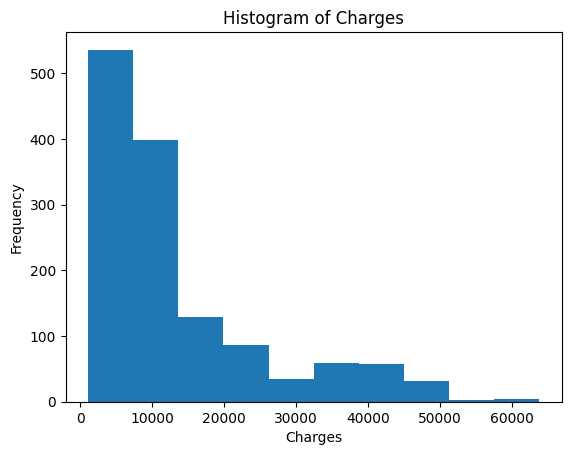

Mean of charges: 13270.42
Standard deviation of charges: 12105.48


In [ ]:
plt.hist(medical['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')
plt.show()

mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'])

print(f"Mean of charges: {mean_charges:.2f}")
print(f"Standard deviation of charges: {std_charges:.2f}")

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

**A:** Since we are assuming these data represent a random sample from the hospital's charges, we can apply the Central Limit Theorem (CLT). The CLT states that, even if the original data distribution is not normal (as we saw with the charges), the sampling distribution of the mean will approach a normal distribution as the sample size increases. With a sample size of 1338, which is sufficiently large, we can assume that the sampling distribution of the mean charge is approximately normal. This allows us to use frequentist statistical methods to make inferences about the population mean charge.

To address the administrator's concern about the average charge falling below 12,000, the most appropriate frequentist test is a **one-sample t-test**. We use a t-test because the population standard deviation is unknown, and we are estimating it from the sample. A one-sample test is suitable as we are comparing the sample mean to a single hypothesized value (12,000).

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

**A:** The administrator is specifically concerned that the actual average charge has **fallen below** a key threshold of 12,000. This means they are only interested in whether the true population mean charge is *less than* 12,000.

A **one-sided confidence interval** is used when we are only interested in whether a population parameter is greater than or less than a certain value, but not if it's simply different. In this scenario, the concern is only about the mean being *too low*. Therefore, we construct a one-sided interval to determine if there is sufficient evidence to conclude that the true mean charge is above 12,000. If the lower bound of the confidence interval is above 12,000, we can be 95% confident that the true mean is not below 12,000. A two-sided interval would be used if the concern was simply whether the mean charge was *different* from 12,000 (either higher or lower).

Since the lower bound of the 95% confidence interval is above 12,000, the administrator should not be concerned.

In [ ]:
# Calculate the standard error of the mean
n = len(medical['charges'])
std_err = std_charges / np.sqrt(n)

# Degrees of freedom for a one-sample t-test
df = n - 1

# Calculate the critical t-value for a one-sided 95% confidence interval
# We use ppf (percent point function) which is the inverse of the cdf
# For a one-sided interval with alpha = 0.05, we look up the value for 1 - alpha = 0.95
critical_value = t.ppf(0.95, df)

print(f"Critical t-value for a one-sided 95% confidence interval: {critical_value:.2f}")

Critical t-value for a one-sided 95% confidence interval: 1.65


In [ ]:
# Calculate the 95% one-sided confidence interval for the mean
# Lower bound is mean - (critical_value * standard_error)
# Upper bound is infinity (since it's a lower bound interval)
lower_bound = mean_charges - (critical_value * std_err)

print(f"95% one-sided confidence interval for the mean charge: ({lower_bound:.2f}, inf)")

# Comment on whether the administrator should be concerned
if lower_bound > 12000:
    print("The administrator should not be concerned, as the lower bound of the 95% confidence interval is above 12,000.")
else:
    print("The administrator should be concerned, as the lower bound of the 95% confidence interval is below 12,000.")

95% one-sided confidence interval for the mean charge: (12725.69, inf)
The administrator should not be concerned, as the lower bound of the 95% confidence interval is above 12,000.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*).

What assumption about the variances of the two groups are we making here?

__A:__

Null Hypothesis ($H_0$): The mean charge for patients with insurance is equal to the mean charge for patients without insurance. ($\mu_{insured} = \mu_{uninsured}$)

Alternative Hypothesis ($H_1$): The mean charge for patients with insurance is different from the mean charge for patients without insurance. ($\mu_{insured} \neq \mu_{uninsured}$)

The assumption we are making about the variances of the two groups when using the pooled standard deviation formula for the t-test is that the variances of the two groups are equal (homoscedasticity).

In [ ]:
# Separate charges for insured and uninsured patients
insured_charges = medical[medical['insuranceclaim'] == 1]['charges']
uninsured_charges = medical[medical['insuranceclaim'] == 0]['charges']

# Calculate sample sizes, means, and standard deviations for each group
n_insured = len(insured_charges)
n_uninsured = len(uninsured_charges)
mean_insured = np.mean(insured_charges)
mean_uninsured = np.mean(uninsured_charges)
std_insured = np.std(insured_charges)
std_uninsured = np.std(uninsured_charges)

print(f"Insured patients: n={n_insured}, mean={mean_insured:.2f}, std={std_insured:.2f}")
print(f"Uninsured patients: n={n_uninsured}, mean={mean_uninsured:.2f}, std={std_uninsured:.2f}")

# Calculate the pooled standard deviation
pooled_std = np.sqrt(((n_insured - 1) * std_insured**2 + (n_uninsured - 1) * std_uninsured**2) / (n_insured + n_uninsured - 2))

print(f"Pooled standard deviation: {pooled_std:.2f}")

# Calculate the t-statistic
t_statistic = (mean_insured - mean_uninsured) / (pooled_std * np.sqrt(1/n_insured + 1/n_uninsured))

print(f"Manually calculated t-statistic: {t_statistic:.2f}")

# Calculate the p-value manually (two-sided test)
# Degrees of freedom
df_manual = n_insured + n_uninsured - 2
# Get the probability from the t-distribution CDF
p_value_manual = 2 * (1 - t.cdf(abs(t_statistic), df_manual))

print(f"Manually calculated p-value: {p_value_manual:.8f}")

Insured patients: n=783, mean=16423.93, std=14036.96
Uninsured patients: n=555, mean=8821.42, std=6440.70
Pooled standard deviation: 11512.28
Manually calculated t-statistic: 11.90
Manually calculated p-value: 0.00000000


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ t value is nearly the same for both approaches 11.9 ~= 11.89

In [ ]:
from scipy.stats import ttest_ind

# Perform independent t-test using scipy.stats
# We assume equal variances (which is consistent with using pooled standard deviation)
t_statistic_scipy, p_value_scipy = ttest_ind(insured_charges, uninsured_charges, equal_var=True)

print(f"SciPy t-statistic: {t_statistic_scipy:.2f}")
print(f"SciPy p-value: {p_value_scipy:.8f}")

SciPy t-statistic: 11.89
SciPy p-value: 0.00000000


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

**A:** When looking through the documentation for statistical test functions in `scipy.stats`, you will find functions for t-tests (like `ttest_ind` for independent samples), but you will **not** find a direct equivalent function specifically for performing a *z*-test from a sample in the same way.

This is because the *z*-test is typically used when the population standard deviation is known. In real-world scenarios, the population standard deviation is rarely known, and we usually have to estimate it from the sample. When we use the sample standard deviation as an estimate for the population standard deviation, the appropriate test statistic follows a *t*-distribution, especially for smaller sample sizes. As the sample size increases, the *t*-distribution approaches the standard normal (z) distribution, and the results of a t-test and z-test become very similar.

Therefore, `scipy.stats` primarily provides t-tests for sample data, as these are more widely applicable when the population standard deviation is unknown. While you could technically perform a z-test if you somehow knew the population standard deviation, `scipy.stats` doesn't offer a dedicated function for this specific case from sample data, as it's not a common scenario in practice. You could, however, calculate the z-statistic manually using the known population standard deviation and then use functions from `scipy.stats.norm` (like `cdf` or `ppf`) to find the p-value.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test

**NOTE: This project was completed with the assistance of Google Colab's built in Gemini AI.**